# 数据改造方案-数据清理-数据拆合
## unstack

In [1]:
import pandas as pd

In [2]:
relationship = pd.read_csv('./officer_relationship_song.csv')
relationship.head()

,Name,姓名,Index year,Sex,Associate,社会关系人姓名,Assoc. Index Year,Assoc. Sex,Association,联系,...,亲属关系,Kin Name,亲戚姓名,Assoc. Kinship Rel.,关系人的亲属关系,Assoc. Kin Name,关系人的亲戚姓名,Distance 距离,Person ID,Assoc ID
0,An Dun,安惇,1042,M,Zou Hao,邹浩,1060.0,M,Opposed or attacked,反对/攻讦,...,未详,Wei Xiang,未详,U,未详,Wei Xiang,未详,1275.341259,1,3888
1,An Dun,安惇,1042,M,Zhang Shiliang,张士良,NaN,M,Opposed or attacked,反对/攻讦,...,未详,Wei Xiang,未详,U,未详,Wei Xiang,未详,NaN,1,25065
2,Chen Jian(2),陈戬,1081,M,Tong Guan,童贯,1054.0,M,Opposed or attacked,反对/攻讦,...,未详,Wei Xiang,未详,U,未详,Wei Xiang,未详,910.189663,31,8124
3,Cheng Yu,程瑀,1087,M,Wu Min,吴敏,1087.0,M,Opposed or attacked,反对/攻讦,...,未详,Wei Xiang,未详,U,未详,Wei Xiang,未详,370.461638,128,8163
4,Zhang Shangying,张商英,1043,M,Sima Guang,司马光,1019.0,M,Opposed or attacked,反对/攻讦,...,未详,Wei Xiang,未详,U,未详,Wei Xiang,未详,868.170971,272,1488


In [3]:
kinship = pd.read_csv('./officer_kinship_song.csv')
kinship.head()

,Name,姓名,Kin Name,亲戚姓名,Kinship
0,An Dun,安惇,An Fang,安邡,S
1,An Dun,安惇,An Fang,安邡,S
2,An Dun,安惇,An Fang,安邡,S
3,An Dun,安惇,An Fang,安邡,S
4,An Dun,安惇,An Fang,安邡,S


### 不同官员不同联系种类有多少人

In [4]:
relationship.columns

Index(['Name', '姓名', 'Index year', 'Sex', 'Associate', '社会关系人姓名',
       'Assoc. Index Year', 'Assoc. Sex', 'Association', '联系', 'Address', '籍贯',
       'X', 'Y', 'Assoc. Address', '联系人籍贯', 'Assoc. X', 'Assoc. Y',
       'Kinship Relation', '亲属关系', 'Kin Name', '亲戚姓名', 'Assoc. Kinship Rel.',
       '关系人的亲属关系', 'Assoc. Kin Name', '关系人的亲戚姓名', 'Distance 距离', 'Person ID',
       'Assoc ID'],
      dtype='object')

In [5]:
# 如何使用unstack(level = ),level = -1是将内层转行成列，level = 0 是将外层转换成列

In [6]:
data1 = relationship[['姓名','联系']].groupby(['姓名','联系']).agg({'姓名':'count'}).unstack(level = -1) # 不写level默认就是-1 
data1

姓名                                 
联系   不合 反对/攻讦 得到Y的支持   支持 政见趋同 遭到Y的反对/攻讦
姓名                                      
丁谓  NaN   NaN    1.0  1.0  NaN       4.0
万俟卨 NaN   NaN    NaN  1.0  NaN       NaN
令狐挻 NaN   NaN    NaN  1.0  NaN       NaN
何执中 NaN   NaN    NaN  NaN  NaN       2.0
余靖  NaN   NaN    2.0  1.0  2.0       1.0
..   ..   ...    ...  ...  ...       ...
高登  NaN   1.0    NaN  2.0  NaN       NaN
高若讷 NaN   1.0    NaN  NaN  NaN       1.0
鲁宗道 NaN   NaN    1.0  NaN  NaN       NaN
黄庭坚 NaN   NaN    NaN  NaN  NaN       1.0
黄策  NaN   1.0    NaN  NaN  NaN       NaN

[188 rows x 6 columns]

In [7]:
data1 = relationship[['姓名','联系']].groupby(['姓名','联系']).agg({'姓名':'count'}).unstack(level = 0)
data1

姓名                                                   ...       \
姓名          丁谓  万俟卨  令狐挻  何执中   余靖   侯蒙   冯京  刘安上  刘安世 刘氏(赵恒皇后)  ...   韩缜   
联系                                                               ...        
不合         NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN      NaN  ...  NaN   
反对/攻讦      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.0      1.0  ...  1.0   
得到Y的支持     1.0  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN      NaN  ...  NaN   
支持         1.0  1.0  1.0  NaN  1.0  NaN  1.0  NaN  NaN      NaN  ...  NaN   
政见趋同       NaN  NaN  NaN  NaN  2.0  NaN  NaN  1.0  NaN      NaN  ...  NaN   
遭到Y的反对/攻讦  4.0  NaN  NaN  2.0  1.0  NaN  NaN  NaN  1.0      NaN  ...  NaN   

                                                           
姓名          马伸  马知节 高氏(赵曙妻)   高琼   高登  高若讷  鲁宗道  黄庭坚   黄策  
联系                                                         
不合         NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
反对/攻讦      NaN  1.0     1.0  NaN  1.0  1.0  NaN  NaN  1.0  
得到Y的支持     1.0  NaN     NaN  NaN  NaN  NaN  1.0  NaN  NaN  
支持         NaN  NaN     1.0  1.0  2.0  NaN  NaN  NaN  NaN  
政见趋同       NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
遭到Y的反对/攻讦  NaN  NaN     NaN  NaN  NaN  1.0  NaN  1.0  NaN  

[6 rows x 188 columns]

In [8]:
data1 = relationship[['姓名','联系']].groupby(['姓名','联系']).agg({'姓名':'count'}).unstack(level = -1)
data1

姓名                                 
联系   不合 反对/攻讦 得到Y的支持   支持 政见趋同 遭到Y的反对/攻讦
姓名                                      
丁谓  NaN   NaN    1.0  1.0  NaN       4.0
万俟卨 NaN   NaN    NaN  1.0  NaN       NaN
令狐挻 NaN   NaN    NaN  1.0  NaN       NaN
何执中 NaN   NaN    NaN  NaN  NaN       2.0
余靖  NaN   NaN    2.0  1.0  2.0       1.0
..   ..   ...    ...  ...  ...       ...
高登  NaN   1.0    NaN  2.0  NaN       NaN
高若讷 NaN   1.0    NaN  NaN  NaN       1.0
鲁宗道 NaN   NaN    1.0  NaN  NaN       NaN
黄庭坚 NaN   NaN    NaN  NaN  NaN       1.0
黄策  NaN   1.0    NaN  NaN  NaN       NaN

[188 rows x 6 columns]

## 删除列

1.删除字段drop 什么是字段就是一列
2. 删除记录dropna 什么是记录就是一行
3.填补数据fillna (method = ffill/bfill)

In [9]:
data_score = pd.read_excel('./成绩.xlsx')
data_score

,姓名,数学,语文,外语,科学
0,张三,47,95,19.0,NaN
1,李四,58,57,78.0,NaN
2,王五,93,90,NaN,NaN
3,赵六,66,40,86.0,NaN
4,孙七,23,19,79.0,NaN
5,马八,15,55,94.0,NaN


In [10]:
data_score.drop('科学',axis = 1,inplace=True)

In [11]:
data_score.fillna(0) # data_score.fillna({'外语':0})

,姓名,数学,语文,外语
0,张三,47,95,19.0
1,李四,58,57,78.0
2,王五,93,90,0.0
3,赵六,66,40,86.0
4,孙七,23,19,79.0
5,马八,15,55,94.0


In [12]:
# 替换空
data1.fillna(0,inplace=True)

In [13]:
data1

姓名                                 
联系    不合 反对/攻讦 得到Y的支持   支持 政见趋同 遭到Y的反对/攻讦
姓名                                       
丁谓   0.0   0.0    1.0  1.0  0.0       4.0
万俟卨  0.0   0.0    0.0  1.0  0.0       0.0
令狐挻  0.0   0.0    0.0  1.0  0.0       0.0
何执中  0.0   0.0    0.0  0.0  0.0       2.0
余靖   0.0   0.0    2.0  1.0  2.0       1.0
..   ...   ...    ...  ...  ...       ...
高登   0.0   1.0    0.0  2.0  0.0       0.0
高若讷  0.0   1.0    0.0  0.0  0.0       1.0
鲁宗道  0.0   0.0    1.0  0.0  0.0       0.0
黄庭坚  0.0   0.0    0.0  0.0  0.0       1.0
黄策   0.0   1.0    0.0  0.0  0.0       0.0

[188 rows x 6 columns]

In [14]:
relationship.columns

Index(['Name', '姓名', 'Index year', 'Sex', 'Associate', '社会关系人姓名',
       'Assoc. Index Year', 'Assoc. Sex', 'Association', '联系', 'Address', '籍贯',
       'X', 'Y', 'Assoc. Address', '联系人籍贯', 'Assoc. X', 'Assoc. Y',
       'Kinship Relation', '亲属关系', 'Kin Name', '亲戚姓名', 'Assoc. Kinship Rel.',
       '关系人的亲属关系', 'Assoc. Kin Name', '关系人的亲戚姓名', 'Distance 距离', 'Person ID',
       'Assoc ID'],
      dtype='object')

1.为什么删除

In [15]:
# 查看男性女性的个数，男女个数差别很小,多余
relationship[['Sex']].groupby('Sex').agg({'Sex':'count'})

,Sex
Sex,
F,5
M,501


In [16]:
relationship.drop('Sex',axis = 1)

,Name,姓名,Index year,Associate,社会关系人姓名,Assoc. Index Year,Assoc. Sex,Association,联系,Address,...,亲属关系,Kin Name,亲戚姓名,Assoc. Kinship Rel.,关系人的亲属关系,Assoc. Kin Name,关系人的亲戚姓名,Distance 距离,Person ID,Assoc ID
0,An Dun,安惇,1042,Zou Hao,邹浩,1060.0,M,Opposed or attacked,反对/攻讦,Qujiang,...,未详,Wei Xiang,未详,U,未详,Wei Xiang,未详,1275.341259,1,3888
1,An Dun,安惇,1042,Zhang Shiliang,张士良,NaN,M,Opposed or attacked,反对/攻讦,Qujiang,...,未详,Wei Xiang,未详,U,未详,Wei Xiang,未详,NaN,1,25065
2,Chen Jian(2),陈戬,1081,Tong Guan,童贯,1054.0,M,Opposed or attacked,反对/攻讦,Songxi,...,未详,Wei Xiang,未详,U,未详,Wei Xiang,未详,910.189663,31,8124
3,Cheng Yu,程瑀,1087,Wu Min,吴敏,1087.0,M,Opposed or attacked,反对/攻讦,Fuliang,...,未详,Wei Xiang,未详,U,未详,Wei Xiang,未详,370.461638,128,8163
4,Zhang Shangying,张商英,1043,Sima Guang,司马光,1019.0,M,Opposed or attacked,反对/攻讦,Xinjin,...,未详,Wei Xiang,未详,U,未详,Wei Xiang,未详,868.170971,272,1488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Yu Jing,余靖,1000,Ouyang Xiu,欧阳修,1007.0,M,Agreed with views of,政见趋同,Qujiang,...,未详,Wei Xiang,未详,U,未详,Wei Xiang,未详,1066.098438,12319,1384
502,Yu Jing,余靖,1000,Yin Zhu,尹洙,1001.0,M,Agreed with views of,政见趋同,Qujiang,...,未详,Wei Xiang,未详,U,未详,Wei Xiang,未详,1102.124909,12319,7104
503,Kong Daofu,孔道辅,986,Yang Xie,杨偕,980.0,M,Agreed with views of,政见趋同,Xianyuan,...,未详,Wei Xiang,未详,U,未详,Wei Xiang,未详,431.228735,15939,2003
504,Liu Anshang,刘安上,1069,Shi Gongbi,石公弼,1061.0,M,Agreed with views of,政见趋同,Yongjia,...,未详,Wei Xiang,未详,U,未详,Wei Xiang,未详,165.947261,17479,13417


In [17]:
# 506条未详，多余
relationship[['姓名','亲戚姓名']].groupby('亲戚姓名').agg({'姓名':'count'})

,姓名
亲戚姓名,
未详,506


In [18]:
# 未详，多余
relationship[['关系人的亲戚姓名','Name']].groupby('关系人的亲戚姓名').agg({'Name':'count'})

,Name
关系人的亲戚姓名,
未详,506


In [19]:
relationship.drop(['Sex','Assoc. Sex','Kinship Relation', '亲属关系', 'Kin Name', '亲戚姓名', 'Assoc. Kinship Rel.','关系人的亲属关系', 'Assoc. Kin Name', '关系人的亲戚姓名'],axis=1,inplace=True)

In [20]:
relationship.columns

Index(['Name', '姓名', 'Index year', 'Associate', '社会关系人姓名', 'Assoc. Index Year',
       'Association', '联系', 'Address', '籍贯', 'X', 'Y', 'Assoc. Address',
       '联系人籍贯', 'Assoc. X', 'Assoc. Y', 'Distance 距离', 'Person ID',
       'Assoc ID'],
      dtype='object')

In [21]:
relationship

,Name,姓名,Index year,Associate,社会关系人姓名,Assoc. Index Year,Association,联系,Address,籍贯,X,Y,Assoc. Address,联系人籍贯,Assoc. X,Assoc. Y,Distance 距离,Person ID,Assoc ID
0,An Dun,安惇,1042,Zou Hao,邹浩,1060.0,Opposed or attacked,反对/攻讦,Qujiang,渠江,106.631752,30.477690,Wujin,武进,119.952301,31.782784,1275.341259,1,3888
1,An Dun,安惇,1042,Zhang Shiliang,张士良,NaN,Opposed or attacked,反对/攻讦,Qujiang,渠江,106.631752,30.477690,[Unknown],[未详],NaN,NaN,NaN,1,25065
2,Chen Jian(2),陈戬,1081,Tong Guan,童贯,1054.0,Opposed or attacked,反对/攻讦,Songxi,松溪,118.774612,27.528404,Kaifeng,开封,114.343330,34.785477,910.189663,31,8124
3,Cheng Yu,程瑀,1087,Wu Min,吴敏,1087.0,Opposed or attacked,反对/攻讦,Fuliang,浮梁,117.236359,29.382742,Yangzi,扬子,119.177627,32.267544,370.461638,128,8163
4,Zhang Shangying,张商英,1043,Sima Guang,司马光,1019.0,Opposed or attacked,反对/攻讦,Xinjin,新津,103.810936,30.423536,Xia Xian,夏县,111.220055,35.137451,868.170971,272,1488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Yu Jing,余靖,1000,Ouyang Xiu,欧阳修,1007.0,Agreed with views of,政见趋同,Qujiang,曲江,113.603417,24.810209,Xinzheng,新郑,113.719086,34.397324,1066.098438,12319,1384
502,Yu Jing,余靖,1000,Yin Zhu,尹洙,1001.0,Agreed with views of,政见趋同,Qujiang,曲江,113.603417,24.810209,Luoyang,洛阳,112.382630,34.665276,1102.124909,12319,7104
503,Kong Daofu,孔道辅,986,Yang Xie,杨偕,980.0,Agreed with views of,政见趋同,Xianyuan,仙源,116.986059,35.597553,Luoyang,洛阳,112.382630,34.665276,431.228735,15939,2003
504,Liu Anshang,刘安上,1069,Shi Gongbi,石公弼,1061.0,Agreed with views of,政见趋同,Yongjia,永嘉,120.653221,28.018291,Xinchang,新昌,120.902107,29.494654,165.947261,17479,13417


In [22]:
# 删除空行all全空才删，any有任何一空就删
relationship.dropna(how = 'any')

,Name,姓名,Index year,Associate,社会关系人姓名,Assoc. Index Year,Association,联系,Address,籍贯,X,Y,Assoc. Address,联系人籍贯,Assoc. X,Assoc. Y,Distance 距离,Person ID,Assoc ID
0,An Dun,安惇,1042,Zou Hao,邹浩,1060.0,Opposed or attacked,反对/攻讦,Qujiang,渠江,106.631752,30.477690,Wujin,武进,119.952301,31.782784,1275.341259,1,3888
2,Chen Jian(2),陈戬,1081,Tong Guan,童贯,1054.0,Opposed or attacked,反对/攻讦,Songxi,松溪,118.774612,27.528404,Kaifeng,开封,114.343330,34.785477,910.189663,31,8124
3,Cheng Yu,程瑀,1087,Wu Min,吴敏,1087.0,Opposed or attacked,反对/攻讦,Fuliang,浮梁,117.236359,29.382742,Yangzi,扬子,119.177627,32.267544,370.461638,128,8163
4,Zhang Shangying,张商英,1043,Sima Guang,司马光,1019.0,Opposed or attacked,反对/攻讦,Xinjin,新津,103.810936,30.423536,Xia Xian,夏县,111.220055,35.137451,868.170971,272,1488
5,Zhang Dun,章惇,1035,Zheng Yong,郑雍,1031.0,Opposed or attacked,反对/攻讦,Pucheng,浦城,118.536255,27.924686,Xiangyi,襄邑,115.065971,34.430504,795.028298,333,8030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Yu Jing,余靖,1000,Ouyang Xiu,欧阳修,1007.0,Agreed with views of,政见趋同,Qujiang,曲江,113.603417,24.810209,Xinzheng,新郑,113.719086,34.397324,1066.098438,12319,1384
502,Yu Jing,余靖,1000,Yin Zhu,尹洙,1001.0,Agreed with views of,政见趋同,Qujiang,曲江,113.603417,24.810209,Luoyang,洛阳,112.382630,34.665276,1102.124909,12319,7104
503,Kong Daofu,孔道辅,986,Yang Xie,杨偕,980.0,Agreed with views of,政见趋同,Xianyuan,仙源,116.986059,35.597553,Luoyang,洛阳,112.382630,34.665276,431.228735,15939,2003
504,Liu Anshang,刘安上,1069,Shi Gongbi,石公弼,1061.0,Agreed with views of,政见趋同,Yongjia,永嘉,120.653221,28.018291,Xinchang,新昌,120.902107,29.494654,165.947261,17479,13417


In [23]:
# 去重
relationship.drop_duplicates(inplace=True)

In [24]:
relationship

,Name,姓名,Index year,Associate,社会关系人姓名,Assoc. Index Year,Association,联系,Address,籍贯,X,Y,Assoc. Address,联系人籍贯,Assoc. X,Assoc. Y,Distance 距离,Person ID,Assoc ID
0,An Dun,安惇,1042,Zou Hao,邹浩,1060.0,Opposed or attacked,反对/攻讦,Qujiang,渠江,106.631752,30.477690,Wujin,武进,119.952301,31.782784,1275.341259,1,3888
1,An Dun,安惇,1042,Zhang Shiliang,张士良,NaN,Opposed or attacked,反对/攻讦,Qujiang,渠江,106.631752,30.477690,[Unknown],[未详],NaN,NaN,NaN,1,25065
2,Chen Jian(2),陈戬,1081,Tong Guan,童贯,1054.0,Opposed or attacked,反对/攻讦,Songxi,松溪,118.774612,27.528404,Kaifeng,开封,114.343330,34.785477,910.189663,31,8124
3,Cheng Yu,程瑀,1087,Wu Min,吴敏,1087.0,Opposed or attacked,反对/攻讦,Fuliang,浮梁,117.236359,29.382742,Yangzi,扬子,119.177627,32.267544,370.461638,128,8163
4,Zhang Shangying,张商英,1043,Sima Guang,司马光,1019.0,Opposed or attacked,反对/攻讦,Xinjin,新津,103.810936,30.423536,Xia Xian,夏县,111.220055,35.137451,868.170971,272,1488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Yu Jing,余靖,1000,Ouyang Xiu,欧阳修,1007.0,Agreed with views of,政见趋同,Qujiang,曲江,113.603417,24.810209,Xinzheng,新郑,113.719086,34.397324,1066.098438,12319,1384
502,Yu Jing,余靖,1000,Yin Zhu,尹洙,1001.0,Agreed with views of,政见趋同,Qujiang,曲江,113.603417,24.810209,Luoyang,洛阳,112.382630,34.665276,1102.124909,12319,7104
503,Kong Daofu,孔道辅,986,Yang Xie,杨偕,980.0,Agreed with views of,政见趋同,Xianyuan,仙源,116.986059,35.597553,Luoyang,洛阳,112.382630,34.665276,431.228735,15939,2003
504,Liu Anshang,刘安上,1069,Shi Gongbi,石公弼,1061.0,Agreed with views of,政见趋同,Yongjia,永嘉,120.653221,28.018291,Xinchang,新昌,120.902107,29.494654,165.947261,17479,13417


### 对kinship进行操作

In [25]:
kinship

,Name,姓名,Kin Name,亲戚姓名,Kinship
0,An Dun,安惇,An Fang,安邡,S
1,An Dun,安惇,An Fang,安邡,S
2,An Dun,安惇,An Fang,安邡,S
3,An Dun,安惇,An Fang,安邡,S
4,An Dun,安惇,An Fang,安邡,S
...,...,...,...,...,...
1940,Li Shi(Mother of Zhao Zhen),李氏(赵祯母),Li Rende,李仁德,F
1941,Li Shi(Mother of Zhao Zhen),李氏(赵祯母),Zhao Zhen,赵祯,S
1942,Li Shi(Mother of Zhao Zhen),李氏(赵祯母),Li Yonghe,李用和,B-
1943,Shi Tingchen,施庭臣,Shi Yuanran,施渊然,S


In [26]:
kinship.drop_duplicates(inplace=True)

In [27]:
kinship

,Name,姓名,Kin Name,亲戚姓名,Kinship
0,An Dun,安惇,An Fang,安邡,S
7,An Dun,安惇,An Bin,安邠,S
14,An Dun,安惇,An Jiao,安郊,S1
21,An Dun,安惇,An Bang,安邦,S2
28,Chen Jian(2),陈戬,Chen Ding(2),陈鼎,S1
...,...,...,...,...,...
1940,Li Shi(Mother of Zhao Zhen),李氏(赵祯母),Li Rende,李仁德,F
1941,Li Shi(Mother of Zhao Zhen),李氏(赵祯母),Zhao Zhen,赵祯,S
1942,Li Shi(Mother of Zhao Zhen),李氏(赵祯母),Li Yonghe,李用和,B-
1943,Shi Tingchen,施庭臣,Shi Yuanran,施渊然,S


In [28]:
kinship.dropna(how = 'any')

,Name,姓名,Kin Name,亲戚姓名,Kinship
0,An Dun,安惇,An Fang,安邡,S
7,An Dun,安惇,An Bin,安邠,S
14,An Dun,安惇,An Jiao,安郊,S1
21,An Dun,安惇,An Bang,安邦,S2
28,Chen Jian(2),陈戬,Chen Ding(2),陈鼎,S1
...,...,...,...,...,...
1940,Li Shi(Mother of Zhao Zhen),李氏(赵祯母),Li Rende,李仁德,F
1941,Li Shi(Mother of Zhao Zhen),李氏(赵祯母),Zhao Zhen,赵祯,S
1942,Li Shi(Mother of Zhao Zhen),李氏(赵祯母),Li Yonghe,李用和,B-
1943,Shi Tingchen,施庭臣,Shi Yuanran,施渊然,S


In [29]:
kinship.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 1944
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      625 non-null    object
 1   姓名        625 non-null    object
 2   Kin Name  625 non-null    object
 3   亲戚姓名      625 non-null    object
 4   Kinship   625 non-null    object
dtypes: object(5)
memory usage: 29.3+ KB


## 计算亲戚为官数

In [30]:
# 创建三个集合

In [31]:
officer = set(relationship['姓名'])
officer

{'丁谓',
 '万俟卨',
 '令狐挻',
 '何执中',
 '余靖',
 '侯蒙',
 '冯京',
 '刘安上',
 '刘安世',
 '刘氏(赵恒皇后)',
 '刘筠',
 '刘錡',
 '卢多逊',
 '句龙如渊',
 '叶祖洽',
 '司马光',
 '向子諲',
 '向宗良',
 '吕大防',
 '吕夷简',
 '吕惠卿',
 '吕诲',
 '吕颐浩',
 '吴充',
 '吴懋',
 '吴玠',
 '周嘉正',
 '周敦颐',
 '唐介',
 '唐重',
 '夏竦',
 '孔道辅',
 '孙固',
 '孙览',
 '孟彦卿',
 '孟氏(赵煦妻)',
 '安惇',
 '安扶',
 '宋乔年',
 '宗泽',
 '寇准',
 '富弼',
 '尹洙',
 '岳飞',
 '师骥',
 '常安民',
 '常秩',
 '张九成',
 '张商英',
 '张士逊',
 '张康国',
 '张扩',
 '张知白',
 '张载',
 '张逊',
 '张邵',
 '彭思永',
 '彭汝砺',
 '施庭臣',
 '施昌言',
 '晏殊',
 '曹修古',
 '曹利用',
 '曾布',
 '曾肇',
 '朱胜非',
 '李光',
 '李处耘',
 '李宾王',
 '李师中',
 '李弥大',
 '李氏(赵祯母)',
 '李渭',
 '李纲',
 '李迪',
 '李邦彦',
 '李邴',
 '杜衍',
 '杨偕',
 '杨徽之',
 '杨愿',
 '杨畏',
 '杨覃',
 '柳瑊',
 '柴禹锡',
 '江褒',
 '汪伯彦',
 '汪藻',
 '沈季长',
 '沈辽',
 '洪皓',
 '温益',
 '潘美',
 '潘良贵',
 '狄青',
 '王公彦',
 '王安石',
 '王安礼',
 '王尧臣',
 '王旦',
 '王显',
 '王珪',
 '王畴',
 '王祖道',
 '王纶',
 '王钦若',
 '王震',
 '王黼',
 '皮公弼',
 '石介',
 '祖无择',
 '种师道',
 '秦桧',
 '秦熺',
 '程琳',
 '程瑀',
 '程颐',
 '章惇',
 '章綡',
 '章縡',
 '胡则',
 '胡宗愈',
 '胡宪',
 '胡宿',
 '胡瑗',
 '胥偃',
 '苏安世',
 '苏舜钦',
 '苏轼',
 '苏辙',
 '苗傅',
 '范仲淹',
 '范

In [32]:
associate = set(relationship['社会关系人姓名'])
associate

{'丁谓',
 '万俟卨',
 '令狐挻',
 '仲并',
 '任尽言',
 '任希夷',
 '何?',
 '何彦猷',
 '何逢原',
 '余允文',
 '余靖',
 '侯莫陈利用',
 '倪展',
 '冯京',
 '冯如晦',
 '凌景夏',
 '刘元瑜',
 '刘嗣明',
 '刘安世',
 '刘定',
 '刘拯',
 '刘挚',
 '刘氏(赵恒皇后)',
 '刘渤',
 '刘珙',
 '刘筠',
 '刘錡',
 '卢法原',
 '句龙如渊',
 '史祺孙',
 '叶涛',
 '叶祖洽',
 '司马光',
 '向子諲',
 '向宗良',
 '吕大防',
 '吕夷简',
 '吕惠卿',
 '吕溱',
 '吕诲',
 '吕颐浩',
 '吴充',
 '吴大成',
 '吴敏',
 '吴材',
 '吴秉信',
 '吴鼎臣',
 '周嘉正',
 '唐垧',
 '夏竦',
 '夏颍达',
 '姚孚',
 '孔道辅',
 '孙升',
 '孙沔',
 '孙觌',
 '安惇',
 '安焘',
 '宗泽',
 '寇准',
 '富弼',
 '富直柔',
 '尹洙',
 '岳霖',
 '岳飞',
 '常秩',
 '常立',
 '康与之',
 '张九成',
 '张俊',
 '张商英',
 '张士良',
 '张士逊',
 '张孝祥',
 '张守',
 '张尧佐',
 '张嵲',
 '张师德',
 '张扩',
 '张择行',
 '张浚',
 '张知白',
 '张纲',
 '张逊',
 '张通',
 '张邦昌',
 '张邵',
 '张阐',
 '弭德超',
 '徐仁杰',
 '徐勣',
 '徐禧',
 '徐铉',
 '慕容延钊',
 '方宙',
 '方畴',
 '施庭臣',
 '施昌言',
 '晁端彦',
 '晏殊',
 '曹修古',
 '曹利用',
 '曹泳',
 '曾布',
 '曾诞',
 '朱台符',
 '朱在',
 '朱胜非',
 '权邦彦',
 '李之纯',
 '李公懋',
 '李孝寿',
 '李宪',
 '李师中',
 '李平西',
 '李弥大',
 '李昭远',
 '李氏(赵祯母)',
 '李深',
 '李渭',
 '李溥',
 '李纲',
 '李邴',
 '李阶',
 '杜衍',
 '来之邵',
 '杨偕',
 '杨徽之',
 '杨愿',
 '杨氏(赵恒妃)',
 '杨畏',
 

In [33]:
kin = set(kinship['亲戚姓名'])
kin

{'丁D',
 '丁玘',
 '丁珙',
 '丁珝',
 '丁珷',
 '丁说',
 '丁诵',
 '丁谏',
 '丁颢',
 '万俟湜',
 '万俟虎',
 '何佾',
 '何君平',
 '何志同',
 '余仲询',
 '余伯庄',
 '余叔英',
 '余庆',
 '冯式',
 '冯询',
 '冯谌',
 '刘C',
 '刘仲武',
 '刘伯英',
 '刘光远',
 '刘克臣',
 '刘尧仁',
 '刘尧佐',
 '刘尧勛',
 '刘延庆',
 '刘弢',
 '刘益',
 '刘美',
 '刘航',
 '刘诚',
 '刘诰',
 '刘谠',
 '刘通',
 '刘麟',
 '勾龙似',
 '勾龙佃',
 '勾龙僎',
 '卢亿',
 '卢宽',
 '卢察',
 '卢雍',
 '叶祖谊',
 '司马康',
 '司马旦',
 '司马池',
 '向宗回',
 '向宗明',
 '向洺',
 '向浯',
 '向涪',
 '向澹',
 '向经',
 '吕公孺',
 '吕公弼',
 '吕公着',
 '吕公绰',
 '吕升卿',
 '吕和卿',
 '吕大临',
 '吕大忠',
 '吕大钧',
 '吕寅伯',
 '吕当',
 '吕抗',
 '吕搢',
 '吕摭',
 '吕擢',
 '吕景山',
 '吕渊',
 '吕温卿',
 '吕璹',
 '吕由庚',
 '吕由诚',
 '吕荀',
 '吕蒙亨',
 '吕蕡',
 '吕谅卿',
 '吴京',
 '吴安持',
 '吴安诗',
 '吴待问',
 '吴愈',
 '吴扆',
 '吴拱',
 '吴揔',
 '吴撝',
 '吴方',
 '吴璘',
 '吴育',
 '吴诰',
 '周寿',
 '周彦先',
 '周焘',
 '周茂先',
 '周辅成',
 '周述',
 '唐义问',
 '唐之问',
 '唐嘉问',
 '唐待问',
 '唐拱',
 '唐淑问',
 '夏安期',
 '夏承皓',
 '孔勗',
 '孔宗翰',
 '孔陶',
 '孙亿',
 '孙朴',
 '孙竣',
 '孙觉',
 '孟在',
 '孟忠厚',
 '安焘',
 '安邠',
 '安邡',
 '安邦',
 '安郊',
 '宋充国',
 '宋升',
 '宋昪',
 '宗夔',
 '宗沃',
 '宗舜卿',
 '宗颖',
 '寇湘',
 '寇相',
 '富绍京',
 '富绍庭',
 '富

In [34]:
# 官员的亲戚为官数
# 同时是官员的亲戚
officer & kin

{'曾布',
 '曾肇',
 '王安石',
 '王安礼',
 '章綡',
 '章縡',
 '苏轼',
 '苏辙',
 '范仲淹',
 '范纯仁',
 '范纯礼',
 '赵祯',
 '赵顼',
 '韩忠彦',
 '韩琦'}

In [35]:
#亲戚表中亲戚是官员的数据行
kinship.query('亲戚姓名=="曾布" or 亲戚姓名=="曾肇" or 亲戚姓名=="王安石" or 亲戚姓名=="王安礼" or 亲戚姓名=="章綡" or 亲戚姓名=="章縡" or 亲戚姓名=="苏轼" or 亲戚姓名=="范仲淹" or 亲戚姓名=="范纯仁" or 亲戚姓名=="范纯礼" or 亲戚姓名=="赵祯" or 亲戚姓名=="赵顼" or 亲戚姓名=="韩忠彦"  or 亲戚姓名=="韩琦" ')

,Name,姓名,Kin Name,亲戚姓名,Kinship
228,Fan Chunren,范纯仁,Fan Chunli,范纯礼,B-
264,Fan Chunren,范纯仁,Fan Zhongyan,范仲淹,F
309,Fan Chunli,范纯礼,Fan Chunren,范纯仁,B+
311,Fan Chunli,范纯礼,Fan Zhongyan,范仲淹,F
346,Han Qi,韩琦,Han Zhongyan,韩忠彦,S1
385,Han Zhongyan,韩忠彦,Han Qi,韩琦,F
706,Su Zhe,苏辙,Su Shi,苏轼,B+
818,Zeng Bu,曾布,Zeng Zhao,曾肇,B-
850,Wang Anli,王安礼,Wang Anshi,王安石,B+
852,Wang Anshi,王安石,Wang Anli,王安礼,B-


In [36]:
#计算官员的亲属为官数
kin_officer=kinship.query('亲戚姓名=="曾布" or 亲戚姓名=="曾肇" or 亲戚姓名=="王安石" or 亲戚姓名=="王安礼" or 亲戚姓名=="章綡" or 亲戚姓名=="章縡" or 亲戚姓名=="苏轼" or 亲戚姓名=="范仲淹" or 亲戚姓名=="范纯仁" or 亲戚姓名=="范纯礼" or 亲戚姓名=="赵祯" or 亲戚姓名=="赵顼" or 亲戚姓名=="韩忠彦"  or 亲戚姓名=="韩琦" ')
kin_officer[['亲戚姓名','姓名']].groupby('姓名').agg({"亲戚姓名":"count"})

,亲戚姓名
姓名,
曾布,1
曾肇,1
李氏(赵祯母),1
王安石,1
王安礼,1
章綡,1
章縡,1
苏辙,1
范仲淹,2


## 合并数据

In [37]:
data1

姓名                                 
联系    不合 反对/攻讦 得到Y的支持   支持 政见趋同 遭到Y的反对/攻讦
姓名                                       
丁谓   0.0   0.0    1.0  1.0  0.0       4.0
万俟卨  0.0   0.0    0.0  1.0  0.0       0.0
令狐挻  0.0   0.0    0.0  1.0  0.0       0.0
何执中  0.0   0.0    0.0  0.0  0.0       2.0
余靖   0.0   0.0    2.0  1.0  2.0       1.0
..   ...   ...    ...  ...  ...       ...
高登   0.0   1.0    0.0  2.0  0.0       0.0
高若讷  0.0   1.0    0.0  0.0  0.0       1.0
鲁宗道  0.0   0.0    1.0  0.0  0.0       0.0
黄庭坚  0.0   0.0    0.0  0.0  0.0       1.0
黄策   0.0   1.0    0.0  0.0  0.0       0.0

[188 rows x 6 columns]

In [38]:
# 新增列‘亲戚为官数’
data1['亲戚为官数'] = kin_officer[['亲戚姓名','姓名']].groupby('姓名').agg({"亲戚姓名":"count"})

In [39]:
data1

姓名                                  亲戚为官数
联系    不合 反对/攻讦 得到Y的支持   支持 政见趋同 遭到Y的反对/攻讦      
姓名                                             
丁谓   0.0   0.0    1.0  1.0  0.0       4.0   NaN
万俟卨  0.0   0.0    0.0  1.0  0.0       0.0   NaN
令狐挻  0.0   0.0    0.0  1.0  0.0       0.0   NaN
何执中  0.0   0.0    0.0  0.0  0.0       2.0   NaN
余靖   0.0   0.0    2.0  1.0  2.0       1.0   NaN
..   ...   ...    ...  ...  ...       ...   ...
高登   0.0   1.0    0.0  2.0  0.0       0.0   NaN
高若讷  0.0   1.0    0.0  0.0  0.0       1.0   NaN
鲁宗道  0.0   0.0    1.0  0.0  0.0       0.0   NaN
黄庭坚  0.0   0.0    0.0  0.0  0.0       1.0   NaN
黄策   0.0   1.0    0.0  0.0  0.0       0.0   NaN

[188 rows x 7 columns]

In [40]:
# 空值添为0
data1.fillna(0,inplace=True)

In [41]:
data1

姓名                                  亲戚为官数
联系    不合 反对/攻讦 得到Y的支持   支持 政见趋同 遭到Y的反对/攻讦      
姓名                                             
丁谓   0.0   0.0    1.0  1.0  0.0       4.0   0.0
万俟卨  0.0   0.0    0.0  1.0  0.0       0.0   0.0
令狐挻  0.0   0.0    0.0  1.0  0.0       0.0   0.0
何执中  0.0   0.0    0.0  0.0  0.0       2.0   0.0
余靖   0.0   0.0    2.0  1.0  2.0       1.0   0.0
..   ...   ...    ...  ...  ...       ...   ...
高登   0.0   1.0    0.0  2.0  0.0       0.0   0.0
高若讷  0.0   1.0    0.0  0.0  0.0       1.0   0.0
鲁宗道  0.0   0.0    1.0  0.0  0.0       0.0   0.0
黄庭坚  0.0   0.0    0.0  0.0  0.0       1.0   0.0
黄策   0.0   1.0    0.0  0.0  0.0       0.0   0.0

[188 rows x 7 columns]

In [42]:
#解决中文乱码
data1.to_csv('./官员关系表1.csv',encoding='utf_8_sig')

In [43]:
relationship[['姓名','联系']].groupby(['姓名','联系']).agg({'姓名':'count'}).unstack(level = -1) # 不写level默认就是-1 

姓名                                 
联系   不合 反对/攻讦 得到Y的支持   支持 政见趋同 遭到Y的反对/攻讦
姓名                                      
丁谓  NaN   NaN    1.0  1.0  NaN       4.0
万俟卨 NaN   NaN    NaN  1.0  NaN       NaN
令狐挻 NaN   NaN    NaN  1.0  NaN       NaN
何执中 NaN   NaN    NaN  NaN  NaN       2.0
余靖  NaN   NaN    2.0  1.0  2.0       1.0
..   ..   ...    ...  ...  ...       ...
高登  NaN   1.0    NaN  1.0  NaN       NaN
高若讷 NaN   1.0    NaN  NaN  NaN       1.0
鲁宗道 NaN   NaN    1.0  NaN  NaN       NaN
黄庭坚 NaN   NaN    NaN  NaN  NaN       1.0
黄策  NaN   1.0    NaN  NaN  NaN       NaN

[188 rows x 6 columns]

In [44]:
# 去掉多余‘姓名’,去掉agg 
data2 = relationship[['姓名','联系']].groupby(['姓名','联系'])['姓名'].count().unstack(level = -1)  
data2

联系,不合,反对/攻讦,得到Y的支持,支持,政见趋同,遭到Y的反对/攻讦
姓名,,,,,,
丁谓,NaN,NaN,1.0,1.0,NaN,4.0
万俟卨,NaN,NaN,NaN,1.0,NaN,NaN
令狐挻,NaN,NaN,NaN,1.0,NaN,NaN
何执中,NaN,NaN,NaN,NaN,NaN,2.0
余靖,NaN,NaN,2.0,1.0,2.0,1.0
...,...,...,...,...,...,...
高登,NaN,1.0,NaN,1.0,NaN,NaN
高若讷,NaN,1.0,NaN,NaN,NaN,1.0
鲁宗道,NaN,NaN,1.0,NaN,NaN,NaN


In [45]:
data2.fillna(0,inplace=True)
data2

联系,不合,反对/攻讦,得到Y的支持,支持,政见趋同,遭到Y的反对/攻讦
姓名,,,,,,
丁谓,0.0,0.0,1.0,1.0,0.0,4.0
万俟卨,0.0,0.0,0.0,1.0,0.0,0.0
令狐挻,0.0,0.0,0.0,1.0,0.0,0.0
何执中,0.0,0.0,0.0,0.0,0.0,2.0
余靖,0.0,0.0,2.0,1.0,2.0,1.0
...,...,...,...,...,...,...
高登,0.0,1.0,0.0,1.0,0.0,0.0
高若讷,0.0,1.0,0.0,0.0,0.0,1.0
鲁宗道,0.0,0.0,1.0,0.0,0.0,0.0


In [46]:
# 新增列‘亲戚为官数’
data2['亲戚为官数'] = kin_officer[['亲戚姓名','姓名']].groupby('姓名').agg({"亲戚姓名":"count"})
data2

联系,不合,反对/攻讦,得到Y的支持,支持,政见趋同,遭到Y的反对/攻讦,亲戚为官数
姓名,,,,,,,
丁谓,0.0,0.0,1.0,1.0,0.0,4.0,NaN
万俟卨,0.0,0.0,0.0,1.0,0.0,0.0,NaN
令狐挻,0.0,0.0,0.0,1.0,0.0,0.0,NaN
何执中,0.0,0.0,0.0,0.0,0.0,2.0,NaN
余靖,0.0,0.0,2.0,1.0,2.0,1.0,NaN
...,...,...,...,...,...,...,...
高登,0.0,1.0,0.0,1.0,0.0,0.0,NaN
高若讷,0.0,1.0,0.0,0.0,0.0,1.0,NaN
鲁宗道,0.0,0.0,1.0,0.0,0.0,0.0,NaN


In [47]:
data2.fillna(0,inplace=True)
data2

联系,不合,反对/攻讦,得到Y的支持,支持,政见趋同,遭到Y的反对/攻讦,亲戚为官数
姓名,,,,,,,
丁谓,0.0,0.0,1.0,1.0,0.0,4.0,0.0
万俟卨,0.0,0.0,0.0,1.0,0.0,0.0,0.0
令狐挻,0.0,0.0,0.0,1.0,0.0,0.0,0.0
何执中,0.0,0.0,0.0,0.0,0.0,2.0,0.0
余靖,0.0,0.0,2.0,1.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...
高登,0.0,1.0,0.0,1.0,0.0,0.0,0.0
高若讷,0.0,1.0,0.0,0.0,0.0,1.0,0.0
鲁宗道,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [48]:
#解决中文乱码
data2.to_csv('./官员关系表2.csv',encoding='utf_8_sig')

## 另一种方法找亲戚为官数

In [49]:
#哪些官员即是官员又是亲戚
name_set = set(relationship['姓名']) & set(kinship['亲戚姓名'])
name_set

{'曾布',
 '曾肇',
 '王安石',
 '王安礼',
 '章綡',
 '章縡',
 '苏轼',
 '苏辙',
 '范仲淹',
 '范纯仁',
 '范纯礼',
 '赵祯',
 '赵顼',
 '韩忠彦',
 '韩琦'}

In [50]:
#查询出即是官员又是亲戚
df_temp=kinship.query('亲戚姓名 in @name_set')
df_temp

,Name,姓名,Kin Name,亲戚姓名,Kinship
228,Fan Chunren,范纯仁,Fan Chunli,范纯礼,B-
264,Fan Chunren,范纯仁,Fan Zhongyan,范仲淹,F
309,Fan Chunli,范纯礼,Fan Chunren,范纯仁,B+
311,Fan Chunli,范纯礼,Fan Zhongyan,范仲淹,F
346,Han Qi,韩琦,Han Zhongyan,韩忠彦,S1
385,Han Zhongyan,韩忠彦,Han Qi,韩琦,F
706,Su Zhe,苏辙,Su Shi,苏轼,B+
818,Zeng Bu,曾布,Zeng Zhao,曾肇,B-
850,Wang Anli,王安礼,Wang Anshi,王安石,B+
852,Wang Anshi,王安石,Wang Anli,王安礼,B-


In [51]:
#通过亲戚姓名对姓名进行分组统计每个官员对应的亲戚为官的数量

df_temp[['姓名','亲戚姓名']].groupby('亲戚姓名').agg({'姓名':'count'}) # 这样查询为Series

,姓名
亲戚姓名,
曾布,1
曾肇,1
王安石,1
王安礼,1
章綡,1
章縡,1
苏轼,1
苏辙,1
范仲淹,2


## 模型概述

## KMeans入门

In [52]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [53]:
data3 = pd.read_csv("./官员关系表2.csv",index_col ='姓名')

In [54]:
data3

,不合,反对/攻讦,得到Y的支持,支持,政见趋同,遭到Y的反对/攻讦,亲戚为官数
姓名,,,,,,,
丁谓,0.0,0.0,1.0,1.0,0.0,4.0,0.0
万俟卨,0.0,0.0,0.0,1.0,0.0,0.0,0.0
令狐挻,0.0,0.0,0.0,1.0,0.0,0.0,0.0
何执中,0.0,0.0,0.0,0.0,0.0,2.0,0.0
余靖,0.0,0.0,2.0,1.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...
高登,0.0,1.0,0.0,1.0,0.0,0.0,0.0
高若讷,0.0,1.0,0.0,0.0,0.0,1.0,0.0
鲁宗道,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [55]:
data4 = pd.read_csv('./官员关系表2.csv')
data4.set_index('姓名',inplace=True)
data4

,不合,反对/攻讦,得到Y的支持,支持,政见趋同,遭到Y的反对/攻讦,亲戚为官数
姓名,,,,,,,
丁谓,0.0,0.0,1.0,1.0,0.0,4.0,0.0
万俟卨,0.0,0.0,0.0,1.0,0.0,0.0,0.0
令狐挻,0.0,0.0,0.0,1.0,0.0,0.0,0.0
何执中,0.0,0.0,0.0,0.0,0.0,2.0,0.0
余靖,0.0,0.0,2.0,1.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...
高登,0.0,1.0,0.0,1.0,0.0,0.0,0.0
高若讷,0.0,1.0,0.0,0.0,0.0,1.0,0.0
鲁宗道,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [56]:
# 方法1
# 其中n_clusters即我们要聚成几类
# fit(data) 对哪个数据进行聚类
KMeans(n_clusters=2,random_state=0).fit(data3).labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
KMeans(n_clusters=3,random_state=0).fit(data4).labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
data3['聚类标签'] = KMeans(n_clusters=2,random_state=0).fit(data3).labels_
data3['聚类标签']

姓名
丁谓     1
万俟卨    1
令狐挻    1
何执中    1
余靖     1
      ..
高登     1
高若讷    1
鲁宗道    1
黄庭坚    1
黄策     1
Name: 聚类标签, Length: 188, dtype: int32

In [59]:
data3

,不合,反对/攻讦,得到Y的支持,支持,政见趋同,遭到Y的反对/攻讦,亲戚为官数,聚类标签
姓名,,,,,,,,
丁谓,0.0,0.0,1.0,1.0,0.0,4.0,0.0,1
万俟卨,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
令狐挻,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
何执中,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1
余靖,0.0,0.0,2.0,1.0,2.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...
高登,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
高若讷,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
鲁宗道,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [60]:
data3.query("聚类标签 == 1")

,不合,反对/攻讦,得到Y的支持,支持,政见趋同,遭到Y的反对/攻讦,亲戚为官数,聚类标签
姓名,,,,,,,,
丁谓,0.0,0.0,1.0,1.0,0.0,4.0,0.0,1
万俟卨,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
令狐挻,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
何执中,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1
余靖,0.0,0.0,2.0,1.0,2.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...
高登,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
高若讷,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
鲁宗道,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [61]:
data3.query("聚类标签 == 0")

,不合,反对/攻讦,得到Y的支持,支持,政见趋同,遭到Y的反对/攻讦,亲戚为官数,聚类标签
姓名,,,,,,,,
司马光,2.0,2.0,10.0,0.0,0.0,7.0,0.0,0
王安石,5.0,0.0,5.0,1.0,1.0,9.0,1.0,0
秦桧,14.0,5.0,9.0,4.0,1.0,26.0,0.0,0
章惇,1.0,1.0,8.0,2.0,0.0,15.0,0.0,0


## 肘部法则

In [62]:
# 调整字段顺序
data5 = data3[['得到Y的支持','支持','政见趋同','反对/攻讦','遭到Y的反对/攻讦','不合','亲戚为官数','聚类标签']]
data5.head()

,得到Y的支持,支持,政见趋同,反对/攻讦,遭到Y的反对/攻讦,不合,亲戚为官数,聚类标签
姓名,,,,,,,,
丁谓,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1
万俟卨,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
令狐挻,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
何执中,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1
余靖,2.0,1.0,2.0,0.0,1.0,0.0,0.0,1


In [63]:
data4

,不合,反对/攻讦,得到Y的支持,支持,政见趋同,遭到Y的反对/攻讦,亲戚为官数
姓名,,,,,,,
丁谓,0.0,0.0,1.0,1.0,0.0,4.0,0.0
万俟卨,0.0,0.0,0.0,1.0,0.0,0.0,0.0
令狐挻,0.0,0.0,0.0,1.0,0.0,0.0,0.0
何执中,0.0,0.0,0.0,0.0,0.0,2.0,0.0
余靖,0.0,0.0,2.0,1.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...
高登,0.0,1.0,0.0,1.0,0.0,0.0,0.0
高若讷,0.0,1.0,0.0,0.0,0.0,1.0,0.0
鲁宗道,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [64]:
# 肘部法则
#通常我们在聚类过程中k值的选取一般在2~10之间
#定义一个列表保每一次聚类的sse（样本到它们最近的聚类中心的距离平方和）
#其中data就是样本，fit为拟合，KMeans模型去聚类  inertia_样本到它们最近的聚类中心的距离平方和
SSE = []
for i in range(2,11):
    n = KMeans(n_clusters=i,random_state=3).fit(data4).inertia_
    SSE.append(n)
SSE

[984.6032608695652,
 642.7122905027936,
 496.04444444444465,
 426.99771460423676,
 375.6466901667748,
 340.64975209763526,
 299.837307823426,
 259.3291666666666,
 231.24980392156863]

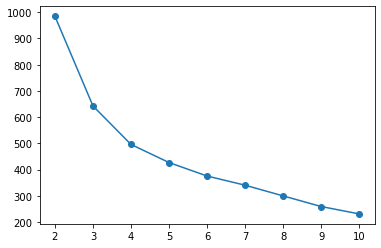

In [65]:
#我们通过可视化看一下
from matplotlib import pyplot as plt
plt.plot([i for i in range(2,11)],SSE,marker='o')
plt.show()
# 从图中可以看出分三个最合适

In [66]:
KMeans(n_clusters=3,random_state=0).fit(data4).labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 轮廓系数

In [67]:
from sklearn.metrics import silhouette_score
list_ = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=3).fit(data3)
    n = silhouette_score(data3,kmeans.labels_)
    list_.append(n)
list_

[0.8612702129813038,
 0.7590307909979322,
 0.6478088946269982,
 0.2820599000219718,
 0.3088809843657254,
 0.3860735157801824,
 0.39884240075013366,
 0.4161260031467582,
 0.4814363045535522]

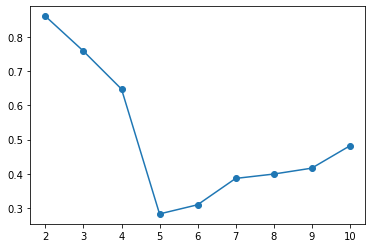

In [68]:
#我们通过可视化看一下
from matplotlib import pyplot as plt
plt.plot([i for i in range(2,11)],list_,marker='o')
plt.show()

In [69]:
# 从图中可以看到制高点是2,3结合上面的肘部法则图共同拥有的点为3

## 优化模型

In [70]:
data6 = KMeans(n_clusters=3,random_state=0).fit(data4).labels_
data6

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [71]:
data4['聚类标签'] = KMeans(n_clusters=3,random_state=0).fit(data4).labels_
data4['聚类标签']

姓名
丁谓     0
万俟卨    0
令狐挻    0
何执中    0
余靖     0
      ..
高登     0
高若讷    0
鲁宗道    0
黄庭坚    0
黄策     0
Name: 聚类标签, Length: 188, dtype: int32

In [72]:
data4

,不合,反对/攻讦,得到Y的支持,支持,政见趋同,遭到Y的反对/攻讦,亲戚为官数,聚类标签
姓名,,,,,,,,
丁谓,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0
万俟卨,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
令狐挻,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
何执中,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0
余靖,0.0,0.0,2.0,1.0,2.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...
高登,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
高若讷,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
鲁宗道,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [73]:
# 对数据进行优化，降维
data4['支持型']=data4['得到Y的支持']+data4['支持']+data4['政见趋同']
data4['对抗型']=data4['反对/攻讦']+data4['不合']+data4['遭到Y的反对/攻讦']
data4

,不合,反对/攻讦,得到Y的支持,支持,政见趋同,遭到Y的反对/攻讦,亲戚为官数,聚类标签,支持型,对抗型
姓名,,,,,,,,,,
丁谓,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0,2.0,4.0
万俟卨,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0,0.0
令狐挻,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0,0.0
何执中,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,0.0,2.0
余靖,0.0,0.0,2.0,1.0,2.0,1.0,0.0,0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...
高登,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1.0,1.0
高若讷,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,2.0
鲁宗道,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0,0.0


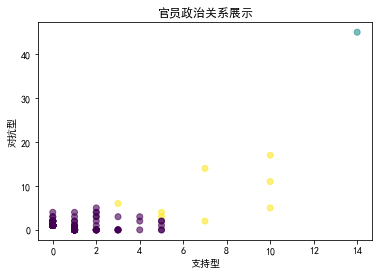

In [74]:
plt.rcParams['font.sans-serif']=['SimHei']
x_data=data4['支持型']
y_data=data4['对抗型']
c=data4['聚类标签']
plt.scatter(x_data,y_data,c=c,alpha=0.6)
plt.title('官员政治关系展示')
plt.xlabel('支持型')
plt.ylabel('对抗型')
plt.show()